#### Find minimum weight cycle in an undirected graph

Given a positive weighted undirected graph, find the minimum weight cycle in it.

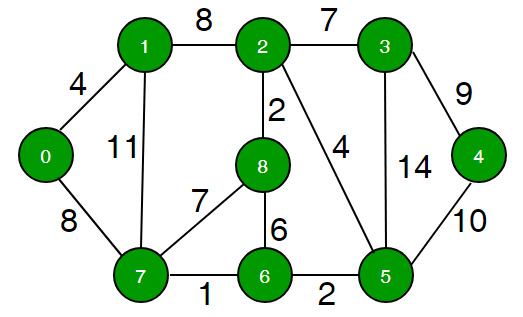

In [1]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Shortest Path/img/graphhh.png")

Minimum weighed cycle :

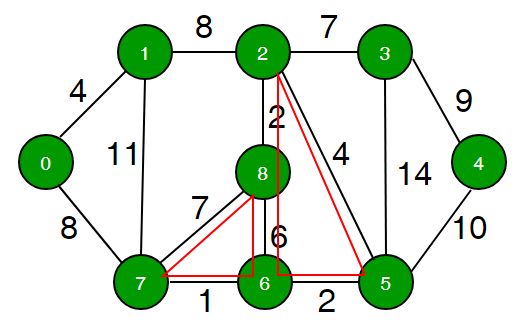

In [4]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Shortest Path/img/graphhh2.png")

Minimum weighed cycle : 7 + 1 + 6 = 14 or 2 + 6 + 2 + 4 = 14 

The idea is to use shortest path algorithm. We one by one remove every edge from the graph, then we find the shortest path between two corner vertices of it. We add an edge back before we process the next edge.

1. create an empty vector 'edge' of size 'E'
   ( E total number of edge). Every element of 
   this vector is used to store information of 
   all the edge in graph info 

2. Traverse every edge edge[i] one - by - one 
    - First remove 'edge[i]' from graph 'G'

    - get current edge vertices which we just 
         removed from graph 

    - Find the shortest path between them 
        "Using Dijkstra’s shortest path algorithm "

    - To make a cycle we add the weight of the 
        removed edge to the shortest path.

    - update min_weight_cycle  if needed 
    
3. return minimum weighted cycle

In [5]:
from sys import maxsize

INF = int(0x3f3f3f3f)

class Edge:
	def __init__(self, u: int,v: int,weight: int) -> None:
		self.u = u
		self.v = v
		self.weight = weight

class Graph:
	def __init__(self, V: int) -> None:
		self.V = V
		self.adj = [[] for _ in range(V)]
		self.edge = []
  
	def addEdge(self, u: int,
					v: int,
					w: int) -> None:
		
		self.adj[u].append((v, w))
		self.adj[v].append((u, w))
		e = Edge(u, v, w)
		self.edge.append(e)
	def removeEdge(self, u: int, v: int, w: int) -> None:
		
		self.adj[u].remove((v, w))
		self.adj[v].remove((u, w))
	def ShortestPath(self, u: int, v: int) -> int:
		setds = set()
		dist = [INF] * self.V
		setds.add((0, u))
		dist[u] = 0
		while (setds):
			tmp = setds.pop()
			uu = tmp[1]
			for i in self.adj[uu]:
				vv = i[0]
				weight = i[1]
				if (dist[vv] > dist[uu] + weight):
					if (dist[vv] != INF):
						if ((dist[vv], vv) in setds):
							setds.remove((dist[vv], vv))

					dist[vv] = dist[uu] + weight
					setds.add((dist[vv], vv))
     
		return dist[v]

	def FindMinimumCycle(self) -> int:
		min_cycle = maxsize
		E = len(self.edge)
		for i in range(E):
			e = self.edge[i]
			self.removeEdge(e.u, e.v, e.weight)
			distance = self.ShortestPath(e.u, e.v)
			min_cycle = min(min_cycle, distance + e.weight)
			self.addEdge(e.u, e.v, e.weight)
		return min_cycle

if __name__ == "__main__":
	V = 9
	g = Graph(V)
	g.addEdge(0, 1, 4)
	g.addEdge(0, 7, 8)
	g.addEdge(1, 2, 8)
	g.addEdge(1, 7, 11)
	g.addEdge(2, 3, 7)
	g.addEdge(2, 8, 2)
	g.addEdge(2, 5, 4)
	g.addEdge(3, 4, 9)
	g.addEdge(3, 5, 14)
	g.addEdge(4, 5, 10)
	g.addEdge(5, 6, 2)
	g.addEdge(6, 7, 1)
	g.addEdge(6, 8, 6)
	g.addEdge(7, 8, 7)
	print(g.FindMinimumCycle())

14


#### Time Complexity: O( E ( E log V ) ) 

#### Space Complexity : O(V^2)

For every edge, we run Dijkstra’s shortest path algorithm so over all time complexity E2logV. 
In set 2 | we will discuss optimize the algorithm to find a minimum weight cycle in undirected graph.